__"The College Scorecard project is designed to increase transparency, putting the power in the hands of students and families to compare colleges and see how well schools are preparing their students to be successful. Students and families compare college costs and outcomes as they weigh the tradeoffs of different colleges, accounting for their own needs and educational goals.__ 

__These data provide insights into the performance of schools that receive federal financial aid dollars, and the outcomes of the students of those schools."__

WE ARE REQUIRED TO DO THE FOLLOWING:

Increase college graduation rates for underpriveleged populations by using cluster analysis to identify the groups of characteristically similar schools in the College Scorecard dataset. 

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### READING THE DATA

In [2]:
df=pd.read_csv("C:/Users/AMRITA/Certification courses/Own Projects/exercises-cluster-analysis-exercise-2/original/CollegeScorecard.csv")

C:\Users\AMRITA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385


In [4]:
df.shape

(7804, 1725)

### REMOVING DUPLICATE ROWS IF ANY

In [5]:
df= df.drop_duplicates()

### DROPPING COLUMNS WITH MORE THAN 30% MISSING VALUES

In [6]:
df= df.replace(to_replace="PrivacySuppressed", value=np.nan)

__Some null values are in the form of PrivacySuppressed.__ 

In [7]:
x= df.isnull().sum()[df.isnull().sum()>=2341]
x.index

Index(['sch_deg', 'locale2', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'RELAFFIL',
       'ADM_RATE', 'ADM_RATE_ALL', 'SATVR25', 'SATVR75',
       ...
       'pct90_earn_wne_p8', 'sd_earn_wne_p8', 'gt_25k_p8', 'count_nwne_p9',
       'count_wne_p9', 'mn_earn_wne_p9', 'sd_earn_wne_p9', 'gt_25k_p9',
       'HI_INC_RPY_3YR_RT_SUPP', 'MALE_RPY_3YR_RT_SUPP'],
      dtype='object', length=1374)

__30% missing values means 2341 values out of 7804 values is missing in a column.__

In [8]:
df.drop(columns=x.index,inplace= True)

In [9]:
df.shape

(7804, 351)

### REMOVING CATEGORICAL VARIABLES & QUALITATIVE VARIABLES

#### Removing binary categorical columns

In [10]:
cat1= df.nunique()[df.nunique()==2]

In [11]:
df.drop(columns= cat1.index,inplace= True)

In [12]:
df.nunique()[df.nunique()<=20]

PREDDEG        5
HIGHDEG        5
CONTROL        3
region        10
LOCALE        12
              ..
CIP54CERT1     3
CIP54CERT2     3
CIP54ASSOC     3
CIP54CERT4     3
CIP54BACHL     3
Length: 195, dtype: int64

__There are 195 columns which we have assumed to be categorcal because they have upto 20 unique values.__
__CIP columns have 3 unique values and from data dictionary they indicate that they are categorical columns.__

#### Checking for columns with 3 unique values

In [13]:
cat2= df.nunique()[df.nunique()==3]
cat2

CONTROL       3
CIP01CERT1    3
CIP01CERT2    3
CIP01ASSOC    3
CIP01CERT4    3
             ..
CIP54CERT1    3
CIP54CERT2    3
CIP54ASSOC    3
CIP54CERT4    3
CIP54BACHL    3
Length: 190, dtype: int64

__Since there 190 variables with 3 unique values, we have to make sure if all the remaining 189 columns are CIP variables.__

In [14]:
cat2.head(50)

CONTROL       3
CIP01CERT1    3
CIP01CERT2    3
CIP01ASSOC    3
CIP01CERT4    3
CIP01BACHL    3
CIP03CERT1    3
CIP03CERT2    3
CIP03ASSOC    3
CIP03CERT4    3
CIP03BACHL    3
CIP04CERT1    3
CIP04CERT2    3
CIP04ASSOC    3
CIP04CERT4    3
CIP04BACHL    3
CIP05CERT1    3
CIP05CERT2    3
CIP05ASSOC    3
CIP05CERT4    3
CIP05BACHL    3
CIP09CERT1    3
CIP09CERT2    3
CIP09ASSOC    3
CIP09CERT4    3
CIP09BACHL    3
CIP10CERT1    3
CIP10CERT2    3
CIP10ASSOC    3
CIP10CERT4    3
CIP10BACHL    3
CIP11CERT1    3
CIP11CERT2    3
CIP11ASSOC    3
CIP11CERT4    3
CIP11BACHL    3
CIP12CERT1    3
CIP12CERT2    3
CIP12ASSOC    3
CIP12CERT4    3
CIP12BACHL    3
CIP13CERT1    3
CIP13CERT2    3
CIP13ASSOC    3
CIP13CERT4    3
CIP13BACHL    3
CIP14CERT1    3
CIP14CERT2    3
CIP14ASSOC    3
CIP14CERT4    3
dtype: int64

In [15]:
cat2.tail(50)

CIP44CERT1    3
CIP44CERT2    3
CIP44ASSOC    3
CIP44CERT4    3
CIP44BACHL    3
CIP45CERT1    3
CIP45CERT2    3
CIP45ASSOC    3
CIP45CERT4    3
CIP45BACHL    3
CIP46CERT1    3
CIP46CERT2    3
CIP46ASSOC    3
CIP46CERT4    3
CIP46BACHL    3
CIP47CERT1    3
CIP47CERT2    3
CIP47ASSOC    3
CIP47CERT4    3
CIP47BACHL    3
CIP48CERT1    3
CIP48CERT2    3
CIP48ASSOC    3
CIP48CERT4    3
CIP48BACHL    3
CIP49CERT1    3
CIP49CERT2    3
CIP49ASSOC    3
CIP49CERT4    3
CIP49BACHL    3
CIP50CERT1    3
CIP50CERT2    3
CIP50ASSOC    3
CIP50CERT4    3
CIP50BACHL    3
CIP51CERT1    3
CIP51CERT2    3
CIP51ASSOC    3
CIP51CERT4    3
CIP51BACHL    3
CIP52CERT1    3
CIP52CERT2    3
CIP52ASSOC    3
CIP52CERT4    3
CIP52BACHL    3
CIP54CERT1    3
CIP54CERT2    3
CIP54ASSOC    3
CIP54CERT4    3
CIP54BACHL    3
dtype: int64

__The first and last 50 predictors are CIP variables. Now we need to check the remaining 89 predictors.__

In [16]:
cat2[51:96]

CIP15CERT1    3
CIP15CERT2    3
CIP15ASSOC    3
CIP15CERT4    3
CIP15BACHL    3
CIP16CERT1    3
CIP16CERT2    3
CIP16ASSOC    3
CIP16CERT4    3
CIP16BACHL    3
CIP19CERT1    3
CIP19CERT2    3
CIP19ASSOC    3
CIP19CERT4    3
CIP19BACHL    3
CIP22CERT1    3
CIP22CERT2    3
CIP22ASSOC    3
CIP22CERT4    3
CIP22BACHL    3
CIP23CERT1    3
CIP23CERT2    3
CIP23ASSOC    3
CIP23CERT4    3
CIP23BACHL    3
CIP24CERT1    3
CIP24CERT2    3
CIP24ASSOC    3
CIP24CERT4    3
CIP24BACHL    3
CIP25CERT1    3
CIP25CERT2    3
CIP25ASSOC    3
CIP25CERT4    3
CIP25BACHL    3
CIP26CERT1    3
CIP26CERT2    3
CIP26ASSOC    3
CIP26CERT4    3
CIP26BACHL    3
CIP27CERT1    3
CIP27CERT2    3
CIP27ASSOC    3
CIP27CERT4    3
CIP27BACHL    3
dtype: int64

In [17]:
cat2[97:141]

CIP29CERT2    3
CIP29ASSOC    3
CIP29BACHL    3
CIP30CERT1    3
CIP30CERT2    3
CIP30ASSOC    3
CIP30CERT4    3
CIP30BACHL    3
CIP31CERT1    3
CIP31CERT2    3
CIP31ASSOC    3
CIP31CERT4    3
CIP31BACHL    3
CIP38CERT1    3
CIP38CERT2    3
CIP38ASSOC    3
CIP38CERT4    3
CIP38BACHL    3
CIP39CERT1    3
CIP39CERT2    3
CIP39ASSOC    3
CIP39CERT4    3
CIP39BACHL    3
CIP40CERT1    3
CIP40CERT2    3
CIP40ASSOC    3
CIP40CERT4    3
CIP40BACHL    3
CIP41CERT1    3
CIP41CERT2    3
CIP41ASSOC    3
CIP41CERT4    3
CIP41BACHL    3
CIP42CERT1    3
CIP42CERT2    3
CIP42ASSOC    3
CIP42CERT4    3
CIP42BACHL    3
CIP43CERT1    3
CIP43CERT2    3
CIP43ASSOC    3
CIP43CERT4    3
CIP43BACHL    3
CIP44CERT1    3
dtype: int64

__Since all the 189 columns are CIP variables, we are assured that all of them can be removed from the data set because they are categorical in nature. CONTROL too is a categorical column which represents whether the institution’s governance structure is public, private nonprofit, or private for-profit.__

In [18]:
df.drop(columns= cat2.index, inplace= True)

In [19]:
df.shape

(7804, 145)

In [20]:
df.nunique()[df.nunique()<=20]

PREDDEG     5
HIGHDEG     5
region     10
LOCALE     12
PCIP29     12
dtype: int64

__PREDDEG can take only 5 values. Where the value 0 represents a missing informaion. So it is definitely categorical. Similarly for HIGHDEG as well.__

__We cannot consider PCIP29 as a categorical column because it of float data type and can take any value.__

In [21]:
df.region.unique()

array([5, 8, 6, 4, 7, 1, 2, 3, 0, 9], dtype=int64)

In [22]:
df.region.isnull().sum()

0

In [23]:
df.LOCALE.unique()

array([12., 13., 32., 31., 41., 21., 43., 42., 11., 23., 33., 22., nan])

In [24]:
df.LOCALE.isnull().sum()

424

__Since there is no information about region and LOCALE, we cannot conclude if it is categorical or not. So we consider them as continuous variables.__

In [25]:
df.drop(columns= ['PREDDEG','HIGHDEG'], inplace=True)

In [26]:
df.shape

(7804, 143)

__Now from 1725 columns, we are left with 143 columns.__

#### Dropping qualitative variables

In [27]:
df.columns

Index(['UNITID', 'OPEID', 'opeid6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'AccredAgency', 'INSTURL', 'NPCURL',
       ...
       'MD_INC_RPY_3YR_RT_SUPP', 'COMPL_RPY_3YR_RT_SUPP',
       'NONCOM_RPY_3YR_RT_SUPP', 'DEP_RPY_3YR_RT_SUPP', 'IND_RPY_3YR_RT_SUPP',
       'PELL_RPY_3YR_RT_SUPP', 'NOPELL_RPY_3YR_RT_SUPP',
       'FEMALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_RPY_3YR_RT_SUPP',
       'NOTFIRSTGEN_RPY_3YR_RT_SUPP'],
      dtype='object', length=143)

In [28]:
df.drop(columns=['UNITID', 'OPEID', 'opeid6', 'INSTNM', 'CITY','STABBR', 'ZIP', 'AccredAgency', 'INSTURL', 'NPCURL'],inplace=True)

In [29]:
df.columns

Index(['NUMBRANCH', 'st_fips', 'region', 'LOCALE', 'LATITUDE', 'LONGITUDE',
       'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05',
       ...
       'MD_INC_RPY_3YR_RT_SUPP', 'COMPL_RPY_3YR_RT_SUPP',
       'NONCOM_RPY_3YR_RT_SUPP', 'DEP_RPY_3YR_RT_SUPP', 'IND_RPY_3YR_RT_SUPP',
       'PELL_RPY_3YR_RT_SUPP', 'NOPELL_RPY_3YR_RT_SUPP',
       'FEMALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_RPY_3YR_RT_SUPP',
       'NOTFIRSTGEN_RPY_3YR_RT_SUPP'],
      dtype='object', length=133)

In [30]:
df.drop(columns=['st_fips','LATITUDE', 'LONGITUDE'],inplace=True)

In [31]:
df.shape

(7804, 130)

### TREATING MISSING VALUES

In [32]:
null_val= df.isnull().sum()[df.isnull().sum()>0]
null_val.count()

128

__We need to impute the missing values for 128 columns.__

In [33]:
col= null_val.index
v=0
for i in col:
    medians= df[i].median()
    df[i]= df[i].fillna(value=medians)

In [34]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [35]:
df.LOCALE.unique()

array([12., 13., 32., 31., 41., 21., 43., 42., 11., 23., 33., 22.])

### APPLYING PCA TO REDUCE DIMENSIONS

In [36]:
X= df.values

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 130)
pca_fit=pca.fit(X)
reduced_X = pca_fit.transform(X)

# 127 Columns present in X are now represented by 4 Principal components present in reduced_X
print(np.round(reduced_X[0:130],2))

[[-11142.82  15770.2   19614.78 ...      0.       -0.        0.  ]
 [ -5521.68  27266.4    3272.6  ...      0.       -0.        0.  ]
 [-19234.87    -42.66   6807.83 ...      0.        0.       -0.  ]
 ...
 [-20641.16  31274.06  -5292.6  ...      0.       -0.        0.  ]
 [-20214.15 -27469.55  -3911.63 ...     -0.       -0.       -0.  ]
 [ 10838.31  10146.47  -4442.12 ...      0.       -0.        0.  ]]


In [38]:
var_explained= pca.explained_variance_ratio_
print(np.round(var_explained,2))

[0.86 0.06 0.03 0.02 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.  ]


In [39]:
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)

[ 86.25  92.54  95.28  97.14  97.99  98.44  98.82  99.09  99.35  99.51
  99.63  99.7   99.75  99.79  99.83  99.86  99.89  99.91  99.93  99.95
  99.96  99.97  99.98  99.99 100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.  ]


(-1, 15)

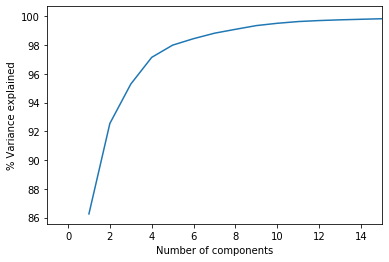

In [40]:
plt.plot( range(1,131), var_explained_cumulative )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')
plt.xlim(-1,15)

__We are getting 5 optimal pricipal components.__

In [41]:
pca = PCA(n_components=4)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)
#130 Columns present in X are now represented by 4-Principal components present in reduced_X

In [42]:
df2= pd.DataFrame(reduced_X, columns=['PC1','PC2','PC3','PC4'])
df2.head()

,PC1,PC2,PC3,PC4
0,-11142.817723,15770.197722,19614.780916,40565.986226
1,-5521.677795,27266.401353,3272.597462,8726.552244
2,-19234.874657,-42.659523,6807.829477,17461.728926
3,-13654.056988,30245.979809,1953.265276,10701.475656
4,-7579.077763,8426.984639,17675.333865,33850.587979


In [43]:
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
x= df2.values
PredictorScalerFit=PredictorScaler.fit(x)

# Generating the standardized values 
x_scaled= PredictorScalerFit.transform(x)
df3= pd.DataFrame(x_scaled)
df3.columns=['PC1','PC2','PC3','PC4']
df3.head()

,PC1,PC2,PC3,PC4
0,-0.118658,0.622114,1.172913,2.938748
1,-0.058799,1.075625,0.195693,0.632183
2,-0.204829,-0.001683,0.407091,1.264991
3,-0.145400,1.193165,0.116800,0.775254
4,-0.080708,0.332434,1.056940,2.452260


In [44]:
v= df3.values

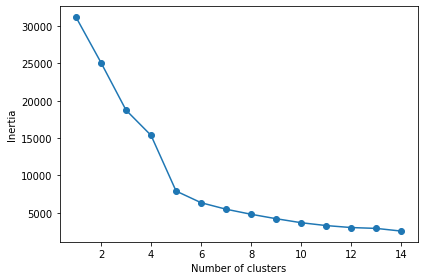

In [45]:
# Finding the best number of clusters based on the inertia value
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertiaValue = []
for i in range(1, 15):
    km = KMeans(n_clusters=i, 
                init='random', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)
    
    km.fit(v)
    inertiaValue.append(km.inertia_)
    
plt.plot(range(1, 15), inertiaValue, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

In [46]:
# Defining the K-Means object for best number of clusters. n=9 in this case
km = KMeans(n_clusters= 5, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

In [47]:
predictedCluster = km.fit_predict(v)
print(predictedCluster)
print('Inertia:', km.inertia_)

[4 1 4 ... 0 0 0]
Inertia: 7880.341019786409


In [48]:
df3['PredictedClusterID']=predictedCluster
df3.head()

,PC1,PC2,PC3,PC4,PredictedClusterID
0,-0.118658,0.622114,1.172913,2.938748,4
1,-0.058799,1.075625,0.195693,0.632183,1
2,-0.204829,-0.001683,0.407091,1.264991,4
3,-0.145400,1.193165,0.116800,0.775254,1
4,-0.080708,0.332434,1.056940,2.452260,4


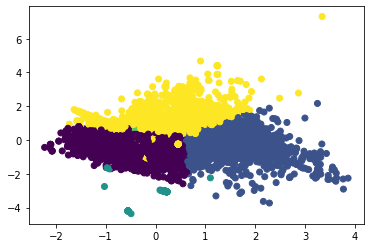

In [49]:
%matplotlib inline
plt.scatter(x=df3['PC2'], y=df3['PC4'], c=df3['PredictedClusterID'])

In [50]:
df3['PredictedClusterID'].value_counts()

0    4224
4    1912
1    1435
2     162
3      71
Name: PredictedClusterID, dtype: int64

        PC1       PC2       PC3       PC4  PredictedClusterID  \
0 -0.118658  0.622114  1.172913  2.938748                   4   
1 -0.058799  1.075625  0.195693  0.632183                   1   
2 -0.204829 -0.001683  0.407091  1.264991                   4   
3 -0.145400  1.193165  0.116800  0.775254                   1   
4 -0.080708  0.332434  1.056940  2.452260                   4   

   PredictedClusterID_2  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


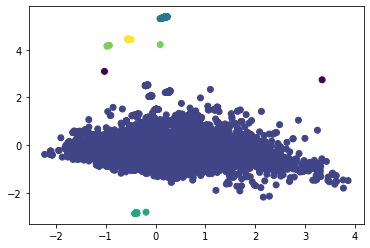

In [57]:
# DBSCAN automatically choosed the number of clusters based on eps and min_samples
from sklearn.cluster import DBSCAN
db = DBSCAN(eps= 1.5, min_samples=4)

df3['PredictedClusterID_2']=db.fit_predict(v)

print(df3.head())
plt.scatter(x=df3['PC2'], y=df3['PC3'], c=df3['PredictedClusterID_2'])

In [56]:
df3['PredictedClusterID_2'].value_counts()

 0    7571
 1     141
 2      71
 4      15
 3       4
-1       2
Name: PredictedClusterID_2, dtype: int64

__-1 indicates the point is a noise, and does not belong to any cluster__

__FROM BOTH K-MEANS AND DBSCAN, WE GET 5 CLUSTERS.__